In [1]:
NEED_TO_INSTALL_PACKAGES = True
if NEED_TO_INSTALL_PACKAGES:
    ! pip install bilby lalsuite
import bilby

In [2]:
from bilby.gw import conversion

#calculate the chirp mass from the component masses
chirp_mass = conversion.component_masses_to_chirp_mass(mass_1=30.1, mass_2=8.3)
print(chirp_mass)

13.234895236609914


In [3]:
POSSIBLE_KEYS = bilby.gw.prior.BBHPriorDict(aligned_spin=True).keys()
print(POSSIBLE_KEYS)

16:56 bilby INFO    : Using aligned spin prior
16:56 bilby INFO    : No prior given, using default BBH priors in /home/codespace/.python/current/lib/python3.12/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


dict_keys(['mass_1', 'mass_2', 'mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 'chi_1', 'chi_2'])


In [4]:
### LET US SETUP SOME INJECTION PARAMETERS
#injection_parameters = dict(
#    mass_1 = 60,
#    mass_2 = 50,
#    mass_ratio = 0.8, #m2/m1
#    chirp_mass = 47.642464144804954,
#    chi_1 = 0.2,
#    chi_2 = 0.3,
#    luminosity_distance = 400,
#    theta_jn = 1.4,
#    psi = 2.0,
#    ra = 1.375,
#    dec = -0.7,
#    phase = 1.2,
#    geocent_time = 100,
#)

injection_parameters = dict(
    mass_1 = 30.1,
    mass_2 = 8.3,
    mass_ratio = 8.3/30.1, #m2/m1
    chirp_mass = 13.234895236609914,
    chi_1 = 0.44,
    chi_2 = 0, #Want dat weten we niet
    luminosity_distance = 740,
    theta_jn = 0.71,
    psi = 2.0, # Proberen localisatie te vinden
    ra = 3.6, # 14h
    dec = 0.65, # 40
    phase = 1.2, #Geen idee wat voor phase het is
    geocent_time = 1239082262.2,
)

In [5]:
waveform_arguments = dict(
    waveform_approximant = 'IMRPhenomPv2',
    reference_frequency = 50,
    minimum_frequency = 20,
    sampling_frequency = 1024,
    duration = 6,
    start_time = injection_parameters['geocent_time'] - 4,
)

In [6]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration = waveform_arguments['duration'],
    sampling_frequency = waveform_arguments['sampling_frequency'],
    frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments = waveform_arguments,
)

16:57 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


/home/codespace/.python/current/lib/python3.12/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
16:57 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 6, 'start_time': 1239082258.2}



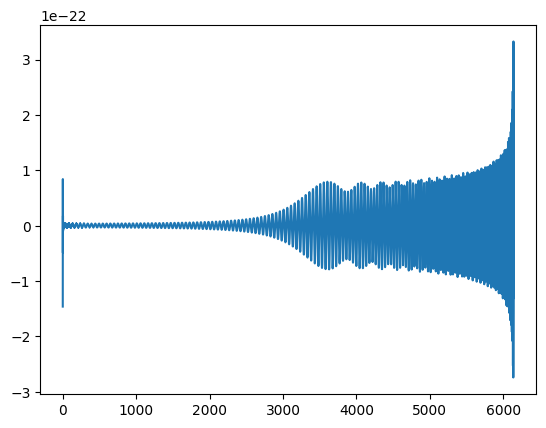

In [7]:
import matplotlib.pyplot as plt
plt.plot(waveform_generator.time_domain_strain(injection_parameters)['plus'])

In [8]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos_00 = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])

ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=waveform_arguments['sampling_frequency'],
                                                   duration=waveform_arguments['duration'],
                                                   start_time=waveform_arguments['start_time'])

ifos_00.set_strain_data_from_zero_noise(sampling_frequency=waveform_arguments['sampling_frequency'],
                                        duration=waveform_arguments['duration'],
                                        start_time=waveform_arguments['start_time'])

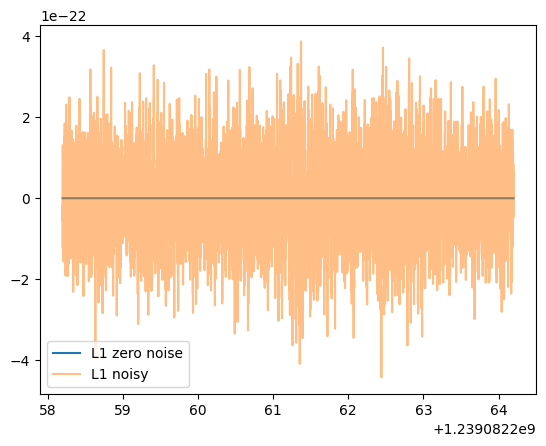

In [9]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

In [10]:
ifos.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

ifos_00.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

16:57 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 6, 'start_time': 1239082258.2}

16:57 bilby INFO    : Injected signal in H1:
16:57 bilby INFO    :   optimal SNR = 18.46
16:57 bilby INFO    :   matched filter SNR = 18.64-1.47j
16:57 bilby INFO    :   mass_1 = 30.1
16:57 bilby INFO    :   mass_2 = 8.3
16:57 bilby INFO    :   mass_ratio = 0.27574750830564787
16:57 bilby INFO    :   chirp_mass = 13.234895236609914
16:57 bilby INFO    :   chi_1 = 0.44
16:57 bilby INFO    :   chi_2 = 0
16:57 bilby INFO    :   luminosity_distance = 740
16:57 bilby INFO    :   theta_jn = 0.71
16:57 bilby INFO    :   psi = 2.0
16:57 bilby INFO    :   ra = 3.6
16:57 bilby INFO    :   dec = 0.65
16:57 bilby INFO    :   phase = 1.2
16:57 bilby INFO    :   geocent_time = 1239082262.2
16:57 bilby INFO    : Inj

[{'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -1.67657490e-25-1.21009587e-25j, -1.67020751e-25-1.20700265e-25j,
          0.00000000e+00-0.00000000e+00j], shape=(3073,)),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.16523796e-25+1.61442475e-25j, -1.16225940e-25+1.60829339e-25j,
          0.00000000e+00+0.00000000e+00j], shape=(3073,))},
 {'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -1.67657490e-25-1.21009587e-25j, -1.67020751e-25-1.20700265e-25j,
          0.00000000e+00-0.00000000e+00j], shape=(3073,)),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.16523796e-25+1.61442475e-25j, -1.16225940e-25+1.60829339e-25j,


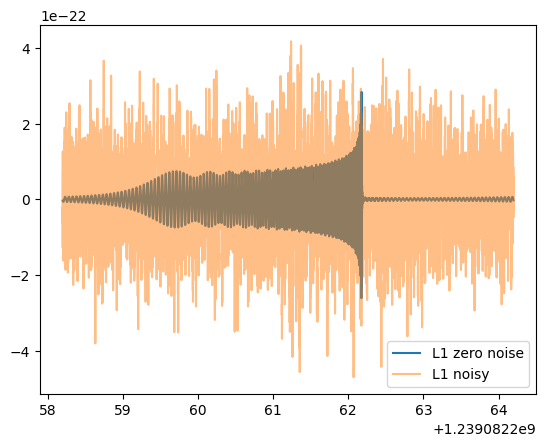

In [11]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

$p(\theta|d) = \dfrac{\mathcal{L}(d|\theta) p(\theta)}{\mathcal{Z(d)}}$

In [12]:
priors = bilby.gw.prior.BBHPriorDict(aligned_spin=True)
priors['mass_1'] = bilby.core.prior.Uniform(name='mass_1', minimum=5, maximum=50, unit=None)
priors['mass_2'] = bilby.core.prior.Uniform(name='mass_2', minimum=5, maximum=50, unit=None)
#priors['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(minimum=10, maximum=50, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
pop_keys = ['mass_ratio', 'chirp_mass']
for key in pop_keys:
  priors.pop(key)
priors

16:57 bilby INFO    : Using aligned spin prior
16:57 bilby INFO    : No prior given, using default BBH priors in /home/codespace/.python/current/lib/python3.12/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


{'mass_1': Uniform(minimum=5, maximum=50, name='mass_1', latex_label='$m_1$', unit=None, boundary=None),
 'mass_2': Uniform(minimum=5, maximum=50, name='mass_2', latex_label='$m_2$', unit=None, boundary=None),
 'luminosity_distance': bilby.gw.prior.UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None),
 'dec': Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None),
 'ra': Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None, boundary='periodic'),
 'theta_jn': Sine(minimum=0, maximum=3.141592653589793, name='theta_jn', latex_label='$\\theta_{JN}$', unit=None, boundary=None),
 'psi': Uniform(minimum=0, maximum=3.141592653589793, name='psi', latex_label='$\\psi$', unit=None, boundary='periodic'),
 'phase': Uniform(minimum=0, maximum=6.283185307179586, name='phase', latex_label

In [13]:
# keys_of_interest = ['chirp_mass', 'dec']
keys_of_interest = ['mass_1', 'mass_2']
for key in priors.keys():
   if key not in keys_of_interest:
       priors[key] = injection_parameters[key]

priors['geocent_time'] = injection_parameters['geocent_time']

In [14]:
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos,
    waveform_generator=waveform_generator,
    priors=priors,
)

In [15]:
bilby.core.utils.logger.setLevel('ERROR')

In [16]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler='dynesty',
    outdir='./outdir',
    label='legends',
    nlive=500,
    resume=False
)

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


8360it [1:08:35,  2.03it/s, bound:814 nc:  1 ncall:5.7e+05 eff:1.6% logz-ratio=399.15+/-0.16 dlogz:0.000>0.1]  



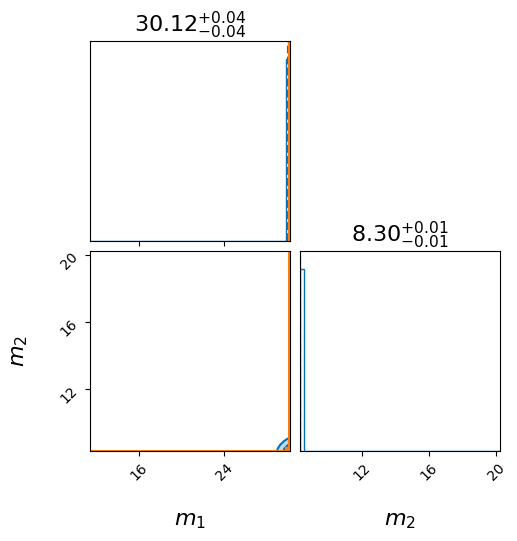

In [17]:
truths = {key:injection_parameters[key] for key in keys_of_interest}
result.plot_corner(truths=truths)